In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [2]:
data = pd.read_csv('./DataSet_HAR.csv')
y = data.values[:, 562]
X = data.values[:, 0:561].astype('float16')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
Labels = clf.classes_

In [4]:
clf.score(X_test, y_test)

0.987378640776699

In [5]:
print(metrics.classification_report(y_test, clf.predict(X_test), target_names=Labels))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       382
           SITTING       0.98      0.96      0.97       364
          STANDING       0.96      0.98      0.97       369
           WALKING       1.00      1.00      1.00       363
WALKING_DOWNSTAIRS       1.00      0.99      0.99       270
  WALKING_UPSTAIRS       0.99      1.00      0.99       312

          accuracy                           0.99      2060
         macro avg       0.99      0.99      0.99      2060
      weighted avg       0.99      0.99      0.99      2060



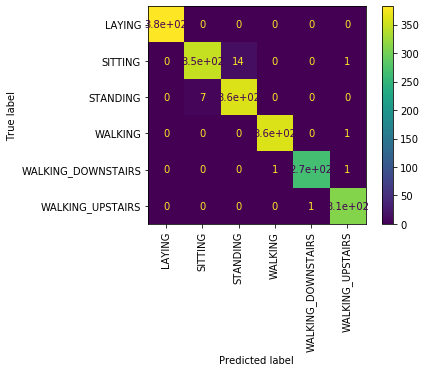

In [6]:
metrics.plot_confusion_matrix(clf, X_test, y_test, xticks_rotation = 'vertical')

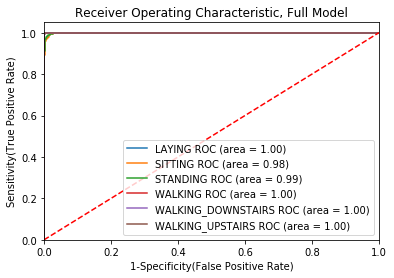

In [7]:
plt.figure()
for i in range(len(Labels)):
    label = Labels[i]
    
    ytrue = y_test == label
    ypred = clf.predict(X_test) == label
    scores = clf.predict_proba(X_test)[:, i]
    
    ytrue = ytrue.astype('int')
    ypred = ypred.astype('int')
    
    
    fpr, tpr, thresholds = metrics.roc_curve(ytrue, scores)
    auc = metrics.roc_auc_score(ytrue, ypred)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label, auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic, Full Model')
plt.legend(loc="lower right")
plt.show()   # Display

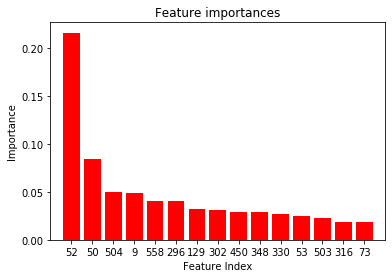

In [8]:
importance = clf.feature_importances_
indices = np.argsort(importance)[::-1]
indices = indices[0:15]
plt.figure()
plt.title("Feature importances")
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.bar(range(15), importance[indices], color="r", align="center")
plt.xticks(range(15), indices)
plt.xlim([-1, 15])
plt.show()

In [9]:
n_f = indices[0:10]

In [10]:
n_y = data.values[:, 562]
n_X = data.values[:, n_f].astype('float16')
X_train2, X_test2, y_train2, y_test2 = train_test_split(n_X, n_y, test_size=0.2)

In [11]:
clf2 = GradientBoostingClassifier()
clf2.fit(X_train2, y_train2)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [12]:
clf2.score(X_test2, y_test2) 

0.9553398058252427

In [13]:
print(n_f)

[ 52  50 504   9 558 296 129 302 450 348]


In [14]:
scores = []
n = 16
for i in range(1, n):
    features = indices[0:i]
    y = data.values[:, 562]
    X = data.values[:, features].astype('float16')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = GradientBoostingClassifier()
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

<Figure size 432x288 with 0 Axes>

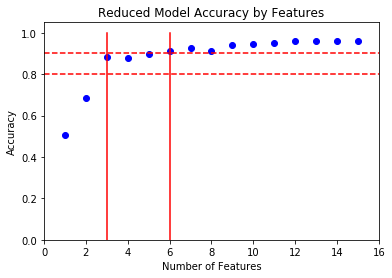

First model to reach 80% accuracy had  3  features.
First model to reach 90% accuracy had  6  features.


In [15]:
n80, n90 = 0, 0
f80, f90 = False, False

plt.figure()
for i in range(len(scores)):
    plt.plot(i+1, scores[i], 'bo')
    if not f80 and scores[i] > .8:
        n80 = i+1
        f80 = True
    if not f90 and scores[i] > .9:
        n90 = i+1
        f90 = True
# Add horizonal lines for 80% and 90% accuracy
plt.plot([0, 16], [.8, .8],'r--')
plt.plot([0, 16], [.9, .9],'r--')
# Add vertical lines for models first hitting 80%/90% accuracy
plt.plot([n80, n80], [0, 1],'r-')
plt.plot([n90, n90], [0, 1],'r-')
plt.xlim([0.0, 16])
plt.ylim([0.0, 1.05])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Reduced Model Accuracy by Features')
plt.show()
print("First model to reach 80% accuracy had ", n80, " features.")
print("First model to reach 90% accuracy had ", n90, " features.")